In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [18]:
import torch
from inpainting.inpainters.rgb_misgan import RGBMisganInpainterInterface
from inpainting.datasets.celeba import train_val_datasets, DEFAULT_MASK_CONFIGS
from pathlib import Path
from inpainting.datasets.utils import RandomRectangleMaskConfig
from inpainting.datasets import mask_coding as mc
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader, TensorDataset
import pickle
from tqdm import tqdm
import numpy as np
from inpainting.visualizations import samples as vis
from inpainting.visualizations.digits import  rgb_with_mask
import matplotlib.pyplot as plt
from inpainting.utils import predictions_for_entire_loader
from inpainting.datasets.mask_coding import KNOWN, UNKNOWN_LOSS

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
experiment_path = Path("../results/celeba/misgan_64x64")

In [9]:
inpainter = RGBMisganInpainterInterface()
chckp = torch.load(
    "/home/mprzewiezlikowski/uj/misgan/results/celeba/"
    "impute_0313.095138_tau_0.5_maskgen_fusion_coef_0.1_0.1_0_block_32/log/checkpoint.pth")
# inpainter.imputer.load_state_dict(chckp)
chckp.keys()

dict_keys(['data_gen', 'mask_gen', 'imputer', 'data_critic', 'mask_critic', 'impu_critic', 'data_gen_opt', 'mask_gen_opt', 'imputer_opt', 'data_critic_opt', 'mask_critic_opt', 'impu_critic_opt', 'epoch', 'critic_updates', 'log', 'args'])

In [11]:
inpainter.imputer.load_state_dict(chckp["imputer"])

<All keys matched successfully>

[autoreload of inpainting.datasets.utils failed: Traceback (most recent call last):
  File "/home/mprzewiezlikowski/anaconda3/envs/uj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/mprzewiezlikowski/anaconda3/envs/uj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/mprzewiezlikowski/anaconda3/envs/uj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/mprzewiezlikowski/anaconda3/envs/uj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/home/mprzewiezlikowski/anaconda3/envs/uj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "<string>", line 3, in __setattr__
dataclasses.FrozenInstanceE

Files already downloaded and verified
Files already downloaded and verified


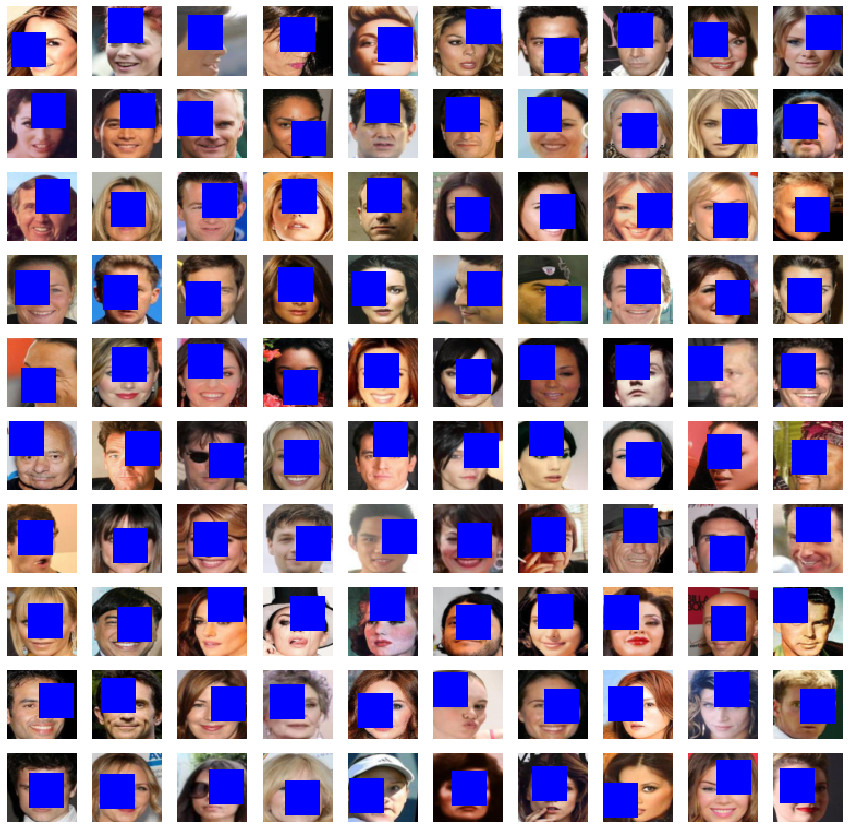

(162770, 19867)

In [56]:
ds_train, ds_val = train_val_datasets(
    Path.home() / "uj/.data/", 
    mask_configs=[RandomRectangleMaskConfig(UNKNOWN_LOSS, 32, 32)],
    resize_size=(100, 100),
    crop_size=(64,64)
)

fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i in range(100):
    (x,j), y = ds_train[i]
#     print(x.shape)
    ax = axes[i // 10, i%10]
#     ax.set_title(f"{y}")
    rgb_with_mask(x.numpy(), j.numpy(), ax)
train_fig = plt.gcf()
train_fig.savefig(experiment_path / "train.png")
plt.show()

len(ds_train), len(ds_val)

In [57]:
batch_size=256
dl_train = DataLoader(ds_train, batch_size, shuffle=True)
dl_val = DataLoader(ds_val, batch_size, shuffle=True)

In [58]:
for (x,j),y in dl_val:
    break

x.shape

torch.Size([256, 3, 64, 64])

In [59]:
results = predictions_for_entire_loader(
    inpainter,
    dl_val,
    device
)

len(results)






0it [00:00, ?it/s]




1it [00:01,  1.17s/it]

torch.Size([256, 3, 64, 64])







2it [00:02,  1.15s/it]

torch.Size([256, 3, 64, 64])







3it [00:03,  1.06s/it]

torch.Size([256, 3, 64, 64])







4it [00:03,  1.01it/s]

torch.Size([256, 3, 64, 64])







5it [00:05,  1.06s/it]

torch.Size([256, 3, 64, 64])







6it [00:06,  1.09s/it]

torch.Size([256, 3, 64, 64])







7it [00:07,  1.07s/it]

torch.Size([256, 3, 64, 64])







8it [00:08,  1.04s/it]

torch.Size([256, 3, 64, 64])







9it [00:09,  1.01s/it]

torch.Size([256, 3, 64, 64])







10it [00:10,  1.01s/it]

torch.Size([256, 3, 64, 64])







11it [00:11,  1.02s/it]

torch.Size([256, 3, 64, 64])







12it [00:12,  1.03s/it]

torch.Size([256, 3, 64, 64])







13it [00:13,  1.03s/it]

torch.Size([256, 3, 64, 64])







14it [00:14,  1.05s/it]

torch.Size([256, 3, 64, 64])







15it [00:15,  1.05s/it]

torch.Size([256, 3, 64, 64])







16it [00:16,  1.06s/it]

torch.Size([256, 3, 64, 64])







17it [00:17,  1.02s/it]

torch.Size([256, 3, 64, 64])







18it [00:18,  1.03it/s]

torch.Size([256, 3, 64, 64])







19it [00:19,  1.01it/s]

torch.Size([256, 3, 64, 64])







20it [00:20,  1.00it/s]

torch.Size([256, 3, 64, 64])







21it [00:21,  1.01it/s]

torch.Size([256, 3, 64, 64])







22it [00:22,  1.02s/it]

torch.Size([256, 3, 64, 64])







23it [00:23,  1.03s/it]

torch.Size([256, 3, 64, 64])







24it [00:24,  1.02s/it]

torch.Size([256, 3, 64, 64])







25it [00:25,  1.02it/s]

torch.Size([256, 3, 64, 64])







26it [00:26,  1.01it/s]

torch.Size([256, 3, 64, 64])







27it [00:27,  1.02it/s]

torch.Size([256, 3, 64, 64])







28it [00:28,  1.02it/s]

torch.Size([256, 3, 64, 64])







29it [00:29,  1.02it/s]

torch.Size([256, 3, 64, 64])







30it [00:30,  1.05it/s]

torch.Size([256, 3, 64, 64])







31it [00:31,  1.04it/s]

torch.Size([256, 3, 64, 64])







32it [00:32,  1.04s/it]

torch.Size([256, 3, 64, 64])







33it [00:33,  1.01s/it]

torch.Size([256, 3, 64, 64])







34it [00:34,  1.01s/it]

torch.Size([256, 3, 64, 64])







35it [00:35,  1.05s/it]

torch.Size([256, 3, 64, 64])
torch.Size([256, 3, 64, 64])







36it [00:37,  1.17s/it]




37it [00:38,  1.11s/it]

torch.Size([256, 3, 64, 64])







38it [00:39,  1.09s/it]

torch.Size([256, 3, 64, 64])







39it [00:40,  1.06s/it]

torch.Size([256, 3, 64, 64])







40it [00:41,  1.21s/it]

torch.Size([256, 3, 64, 64])







41it [00:42,  1.16s/it]

torch.Size([256, 3, 64, 64])







42it [00:43,  1.14s/it]

torch.Size([256, 3, 64, 64])







43it [00:44,  1.09s/it]

torch.Size([256, 3, 64, 64])







44it [00:45,  1.06s/it]

torch.Size([256, 3, 64, 64])







45it [00:47,  1.14s/it]

torch.Size([256, 3, 64, 64])







46it [00:48,  1.12s/it]

torch.Size([256, 3, 64, 64])







47it [00:49,  1.07s/it]

torch.Size([256, 3, 64, 64])







48it [00:49,  1.01s/it]

torch.Size([256, 3, 64, 64])







49it [00:51,  1.03s/it]

torch.Size([256, 3, 64, 64])







50it [00:52,  1.05s/it]

torch.Size([256, 3, 64, 64])







51it [00:53,  1.14s/it]

torch.Size([256, 3, 64, 64])







52it [00:54,  1.11s/it]

torch.Size([256, 3, 64, 64])







53it [00:55,  1.09s/it]

torch.Size([256, 3, 64, 64])







54it [00:56,  1.05s/it]

torch.Size([256, 3, 64, 64])







55it [00:57,  1.07s/it]

torch.Size([256, 3, 64, 64])







56it [00:59,  1.19s/it]

torch.Size([256, 3, 64, 64])







57it [01:00,  1.17s/it]

torch.Size([256, 3, 64, 64])







58it [01:01,  1.11s/it]

torch.Size([256, 3, 64, 64])







59it [01:02,  1.10s/it]

torch.Size([256, 3, 64, 64])







60it [01:03,  1.09s/it]

torch.Size([256, 3, 64, 64])







61it [01:04,  1.15s/it]

torch.Size([256, 3, 64, 64])







62it [01:05,  1.13s/it]

torch.Size([256, 3, 64, 64])







63it [01:06,  1.11s/it]

torch.Size([256, 3, 64, 64])







64it [01:07,  1.13s/it]

torch.Size([256, 3, 64, 64])







65it [01:08,  1.10s/it]

torch.Size([256, 3, 64, 64])







66it [01:10,  1.09s/it]

torch.Size([256, 3, 64, 64])







67it [01:11,  1.14s/it]

torch.Size([256, 3, 64, 64])







68it [01:12,  1.15s/it]

torch.Size([256, 3, 64, 64])







69it [01:13,  1.12s/it]

torch.Size([256, 3, 64, 64])







70it [01:14,  1.13s/it]

torch.Size([256, 3, 64, 64])







71it [01:15,  1.10s/it]

torch.Size([256, 3, 64, 64])







72it [01:16,  1.11s/it]

torch.Size([256, 3, 64, 64])







73it [01:17,  1.08s/it]

torch.Size([256, 3, 64, 64])







74it [01:18,  1.05s/it]

torch.Size([256, 3, 64, 64])







75it [01:19,  1.01it/s]

torch.Size([256, 3, 64, 64])







76it [01:20,  1.03it/s]

torch.Size([256, 3, 64, 64])







77it [01:21,  1.05it/s]

torch.Size([256, 3, 64, 64])







78it [01:22,  1.06s/it]

torch.Size([155, 3, 64, 64])


19867

In [60]:
results_path = experiment_path
results_path.mkdir(parents=True, exist_ok=True)

with (results_path / "val_predictions.pkl").open("wb") as f:
    pickle.dump(results, f)

In [61]:
[
    t.shape for t in results[0]
]

[(3, 64, 64), (3, 64, 64), (1,), (1, 12288), (1, 3, 12288), (1, 12288), (40,)]

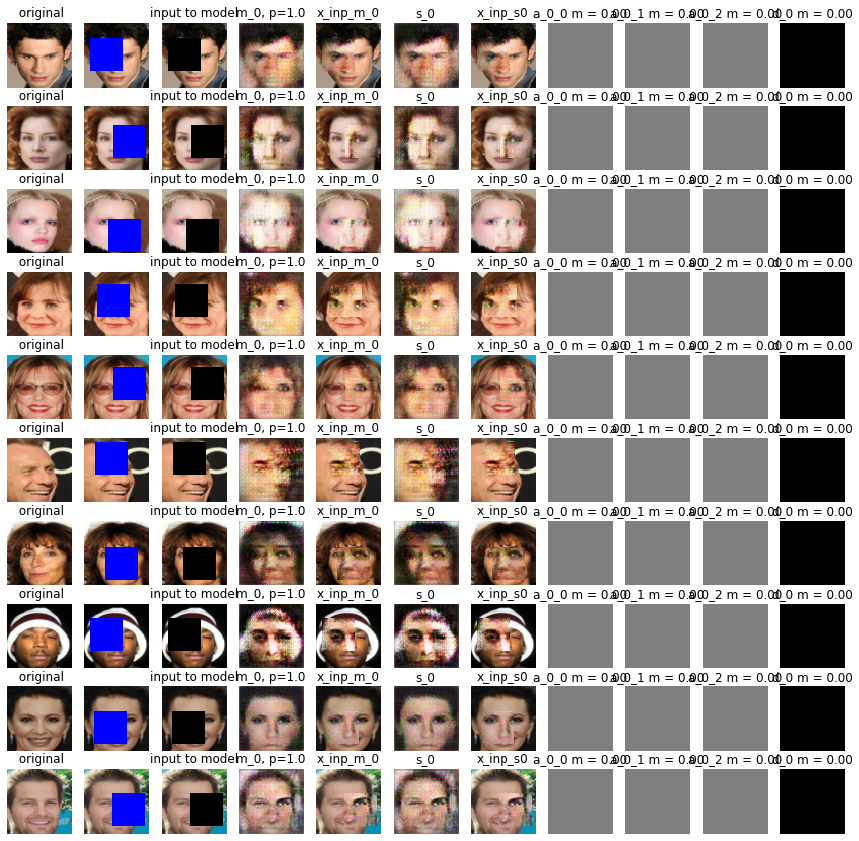

In [62]:
fig, ax = plt.subplots(10, 11, figsize=(15,15)
)

for i in range(10):
    vis.visualize_sample(
        *results[i],
        drawing_fn=rgb_with_mask,
        title_prefixes=dict(),
        ax_row=ax[i]
    )